IMPORTING LIBRARIES

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

LOAD FASHION MNIST DATASET

In [24]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize & Reshape images

In [25]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)  # Shape: (28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# Add Noise

In [26]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)  # Keep values between 0 and 1
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build Autoencoder

In [27]:
input_img = Input(shape=(28, 28, 1))

# Encoder

In [28]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder

In [29]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the model

In [20]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train_noisy, x_train,epochs=10,batch_size=128,shuffle=True,validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.3933 - val_loss: 0.3131
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.3095 - val_loss: 0.3076
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3044 - val_loss: 0.3036
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3009 - val_loss: 0.3015
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2989 - val_loss: 0.3001
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2978 - val_loss: 0.2987
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2959 - val_loss: 0.2977
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2950 - val_loss: 0.2969
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2948 - val_loss: 0.2961
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2935 - val_loss: 0.2955


# Denoise test images

In [21]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Visualize Noisy vs Denoised Images


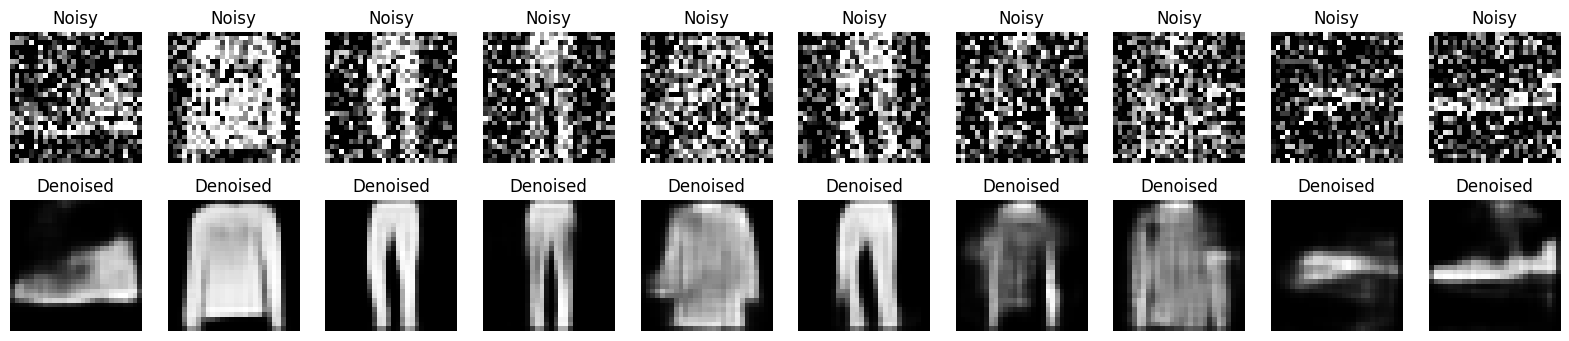

In [22]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.show()


# Evaluate the model

In [23]:
loss = autoencoder.evaluate(x_test_noisy, x_test, verbose=0)
print(f"Test Loss: {loss}")

decoded_imgs = autoencoder.predict(x_test_noisy)
diff = np.abs(decoded_imgs - x_test)
threshold = 0.1  # Adjust this threshold as needed
correct_predictions = np.sum(diff < threshold)
accuracy = correct_predictions / (x_test.shape[0] * x_test.shape[1] * x_test.shape[2])
print(f"Accuracy based on threshold: {accuracy}")


Test Loss: 0.2955314517021179
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy based on threshold: 0.7548274234693878
